# Simulation for Lorentz

In [1]:
import lorenz_map as lmap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
# The generator: 
gen = lmap.LorenzMap(delta_t=1e-3)

In [3]:
# The simulation
res =  gen.full_traj(init_pos=np.ones(3)*0.01, nb_steps=100000)
print(res.shape)

(100000, 3)


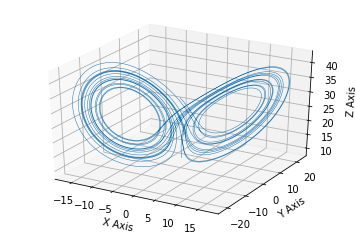

In [4]:
lmap.plot_traj(res[80000:])


# Look at the component

(20000, 3)


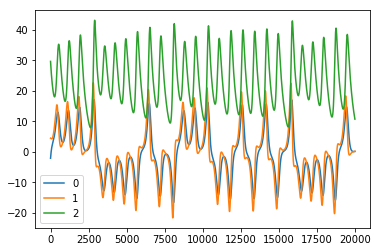

In [6]:
ext = res[80000:]
print(ext.shape)
for i in range(3):
    plt.plot(ext[:,i],label=str(i))
plt.legend()
plt.show()
#print(ext[:,0])

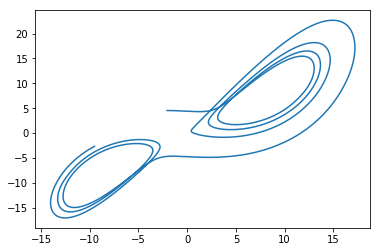

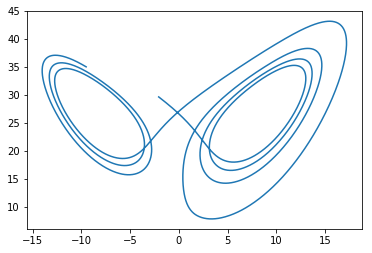

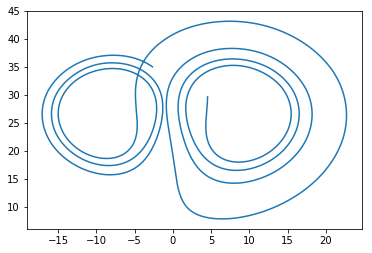

In [20]:
r = range(5000)
#r = range(ext.shape[0])
plt.plot(ext[r,0],ext[r,1])
plt.show()
plt.plot(ext[r,0],ext[r,2])
plt.show()
plt.plot(ext[r,1],ext[r,2])
plt.show()


# The deltas

(20000, 3)


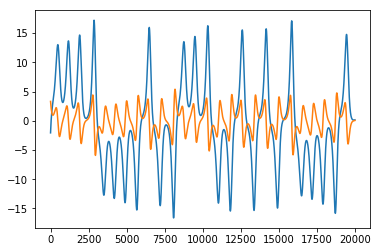

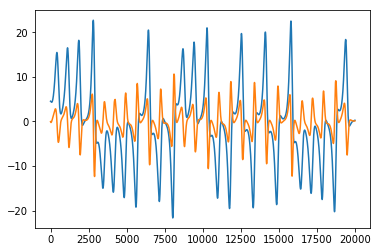

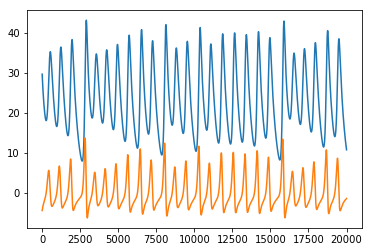

In [21]:
L=20000 # length
S=80000 # start
C=1     # component
delta = res[S:S+L,:]-res[S-1:S+L-1,:]
print(delta.shape)
for i in range(3):
    delta2 = delta[:,i]*50
    plt.plot(res[S:S+L,i])
    plt.plot(delta2)
    plt.show()

# The norm of delta

In [9]:
ndelta = np.square(delta)
ndelta = ndelta.sum(axis=1)
print(ndelta.shape)


(20000,)


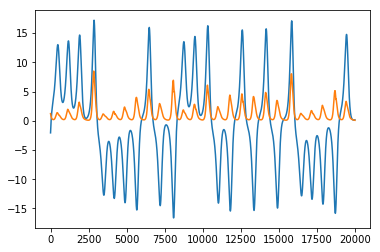

In [10]:
plt.plot(res[S:S+L,0])
plt.plot(ndelta*100)
plt.show()
